## Compute Statistics from Card Draws

Questions for Investigation
This experiment will require the use of a standard deck of playing cards. This is a deck of fifty-two cards divided into four suits (spades (♠), hearts (♥), diamonds (♦), and clubs (♣)), each suit containing thirteen cards (Ace, numbers 2-10, and face cards Jack, Queen, and King). 
For the purposes of this task, assign each card a value: The Ace takes a value of 1, numbered cards take the value printed on the card, and the Jack, Queen, and King each take a value of 10.

In [73]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import special as sc
%matplotlib inline

### 1. Plotting a histogram of card values

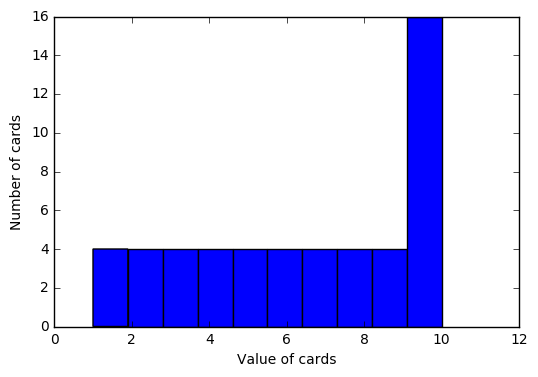

In [20]:
cards = list(range(1, 11)) + [10, 10, 10]
cards = cards * 4
df = pd.DataFrame(data = cards)
plt.figure()
ax = df.plot(kind='hist', bins=10, legend=False)
ax.set_xlabel('Value of cards')
ax.set_ylabel('Number of cards')

### Function to generate Random Sample Data for Cards

In [45]:
def card_random(num_of_cards,sample_size):
    csvfile = ('drawcards.csv')
    drawn_cards = []
    cards = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10,\
            1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, \
            1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10,\
            1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]
    for i in range(sample_size):
        drawn_cards.append(random.sample(cards,num_of_cards))
    df = pd.DataFrame(data = drawn_cards)
    df.to_csv('dataset.csv',index = False, header = False)

### 2. Obtain samples from a deck of cards

We are gonna generate 100 samples and see what is the result

In [46]:
card_random(3,100)

In [57]:
dfr = pd.read_csv('dataset.csv', header=None)
dfr.head()

,0,1,2
0,2,10,1
1,5,10,5
2,10,10,2
3,10,4,5
4,4,9,1


### 3. Report descriptive statistics regarding sample taken

In [68]:
stat_df = pd.DataFrame({'Mean':dfr.mean(), 'Median' : dfr.median(),'Variance' : dfr.var(), 'Standard Deviation' : dfr.std()})
stat_df

,Mean,Median,Standard Deviation,Variance
0,6.73,7.5,3.284045,10.784949
1,6.66,7.0,2.913639,8.489293
2,6.53,7.0,3.073034,9.443535


### 4. Plotting a histogram of sampled values

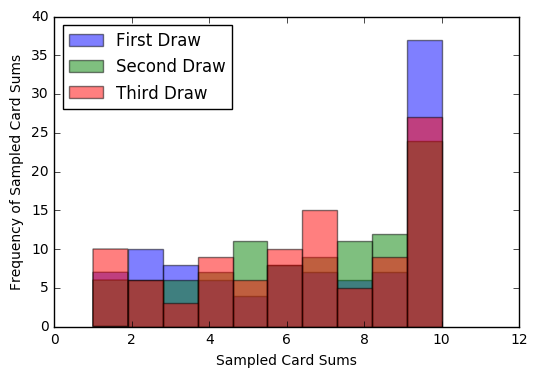

In [59]:
plt.figure()
ax = dfr.plot(kind='hist', bins=10,legend = False,alpha = 0.5)
ax.set_xlabel('Sampled Card Sums') 
ax.set_ylabel('Frequency of Sampled Card Sums')
plt.legend(loc='upper left', labels=['First Draw','Second Draw','Third Draw'])

The original histogram was almost uniform except the cards with value 10 had more frequency. The sampled card distribution above is similarly skewed like the original distribution, however we can ovserve that sums of te sampled cards is more distributed then the original histogram.

### 5. Making estimates based on the sampled distribution

Within what range will you expect approximately 90% of your draw values to fall?

Since it a left skewed histogram, the probability to get a value would lie more in right side of the histogram. Hence for approximately 90% or more, the draws values can be calulated by finding the value for Z-Score having probability as 0.1 and then considering all the values to the right of it. ( Z(-1.28) = 0.1003 )


In [77]:
x = (-1.28) * dfr.std(ddof=False)[0] + df.mean()[0]
print('Range where one can expect approximately 90% of the draw values to fall : ' + str(int(x)) + ' to ' + str(df.max()[0]))

Range where one can expect approximately 90% of the draw values to fall : 2 to 10



The approximate probability to get a value of 20 can again be calculated using Z table but this probability would less than the expected probability since the histogram is a left skewed histogram.

In [78]:
z = (20 - dfr.mean()[0])/dfr.std()[0]
print(z)
p = 1-(sc.ndtr(z))
print('Approximate probability that one will get a draw value of at least 20 : ' + str(p))

4.04074891534
Approximate probability that one will get a draw value of at least 20 : 2.66403897502e-05
